# ECOMMERCE DATA ANALYSIS

# Objective:

**The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We will analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.**


In [69]:
#importing libraries
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

## INFERENCE

**Libraries Import: The code imports essential libraries for data manipulation and visualization, including pandas (pd), numpy (np), and matplotlib (plt). Additionally, seaborn (sns) and mysql are imported for enhanced data visualization and for connection to database respectively.**

# Database Connectivity

In [2]:
#connect to mysql
connection = mysql.connector.connect(
    host='localhost',
    user='root', #your username
    password='root', #your password
    database='ecommerce' #the database from where you to want to fetch the data
)

In [3]:
#create a connection cursor object
cursor = connection.cursor()

In [4]:
#query data from the product table

cursor.execute('SELECT * FROM product')

#storing the data into pandas dataframe

pdt_df= pd.DataFrame(cursor.fetchall(), columns= [col[0] for col in cursor.description])

In [5]:
#query data from the customer table

cursor.execute('SELECT * FROM customer')

#storing the data into pandas dataframe

cst_df= pd.DataFrame(cursor.fetchall(), columns= [col[0] for col in cursor.description])

In [6]:
#query data from the order_details table

cursor.execute('SELECT * FROM order_details')

#storing the data into pandas dataframe

od_df= pd.DataFrame(cursor.fetchall(), columns= [col[0] for col in cursor.description])

In [7]:
#close the connection and cursor
cursor.close()
connection.close()

In [8]:
#printing first 5 records from product table
pdt_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [9]:
#printing first 5 records from customer table
cst_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [10]:
#printing first 5 records from order_details table
od_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


## INFERENCE

**Using head() function,we have displayed the first 5 rows of the product, customer and order_details dataset. This provides a quick preview of the data structure, column names, and initial values.**

In [11]:
#printing last 5 records from product table
pdt_df.tail()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
56,P158,Electric Toothbrush,Appliance,Electronics,4000.0,3000.0,18
57,P159,Car Vacuum,Appliance,Electronics,5000.0,4000.0,20
58,P160,Portable Speaker,Appliance,Electronics,3500.0,3000.0,22
59,P161,Smart Scale,Appliance,Electronics,3000.0,2500.0,20
60,P162,Streaming Device,Electronics,Accessories,5000.0,4000.0,18


In [12]:
#printing last 5 records from product table
cst_df.tail()

,customer_id,name,city,email,phone_no,address,pin_code
57,C1063,Sophia,Tokyo,sophia@gmail.com,5432123456,ss.tt.road,56789
58,C1064,Ethan,Lake Buena Vista,ethan@example.com,9876123456,2000 E Buena Vista Drive,32830
59,C1065,Oliver,Kanagawa,oliver@mail.com,1234987654,17F Ikenobecho,171
60,C1066,Aria,Sydney,aria@gmail.com,9876543210,uu.vv.road,75001
61,C1067,James,Tokyo,james@gmail.com,1234567890,ww.xx.road,56789


In [13]:
#printing last 5 records from product table
od_df.tail()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
71,91,C1063,P159,2.0,8000.0,Online,2024-03-17,Delivered
72,92,C1064,P160,1.0,3000.0,COD,2024-03-18,Cancelled
73,93,C1065,P161,1.0,2500.0,Online,2024-03-19,Delivered
74,94,C1066,P162,1.0,4000.0,COD,2024-03-20,Delivered
75,95,C1067,P154,2.0,4000.0,Online,2024-03-21,Shipped


## INFERENCE

**Using tail() function,we have displayed the last 5 rows of the product, customer and order_details dataset. This provides a quick preview of the data structure, column names, and initial values.**

In [14]:
pdt_df.shape

(61, 7)

## Inference:
**The product dataset comprises 61 rows and 7 columns.**

In [15]:
cst_df.shape

(62, 7)

## Inference:
**The customer dataset comprises 62 rows and 7 columns.**

In [16]:
od_df.shape

(76, 8)

## Inference:
**The order_details dataset comprises 76 rows and 11 columns.**

In [17]:
pdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


##  Inference:
**No Variable column has null/missing values.**

In [18]:
cst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


##  Inference:
**No Variable column has null/missing values.**

In [19]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


##  Inference:
**No Variable column has null/missing values.**

In [20]:
pdt_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


## Inference:
<ol>
    <li>The values in the "count" row are all 61, indicating that there are no missing values in any of the numerical columns.</li>
    <li>The "mean" row provides the average values for each column.</li>
    <li>The "std" row shows the standard deviation, giving a measure of the variability or spread of the data.</li>
    <li>The "min" and "max" rows display the minimum and maximum values, respectively.</li>
    <li>"25%", "50%", and "75%" rows represent the quartiles, providing insights into the distribution of the data.</li>
</ol>

In [21]:
cst_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


## Inference:
<ol>
    <li>The values in the "count" row are all 62, indicating that there are no missing values in any of the numerical columns.</li>
    <li>The "mean" row provides the average values for each column.</li>
    <li>The "std" row shows the standard deviation, giving a measure of the variability or spread of the data.</li>
    <li>The "min" and "max" rows display the minimum and maximum values, respectively.</li>
    <li>"25%", "50%", and "75%" rows represent the quartiles, providing insights into the distribution of the data.</li>
</ol>

In [22]:
od_df.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


## Inference:
<ol>
    <li>The values in the "count" row are all 76, indicating that there are no missing values in any of the numerical columns.</li>
    <li>The "mean" row provides the average values for each column.</li>
    <li>The "std" row shows the standard deviation, giving a measure of the variability or spread of the data.</li>
    <li>The "min" and "max" rows display the minimum and maximum values, respectively.</li>
    <li>"25%", "50%", and "75%" rows represent the quartiles, providing insights into the distribution of the data.</li>
</ol>

# Data Cleaning

In [23]:
pdt_df.nunique()

product_id        61
product_name      43
category           4
sub_category      22
original_price    25
selling_price     26
stock             14
dtype: int64

## Inference:
<ol>
    <li>product_id: There are 61 unique ids in the dataset. This implies that each row corresponds to a different id, and there are no duplicate ids.</li>
    <li>product_name, category, sub_category, original_price, selling_price, stock: The counts of unique values vary, indicating that there are repeated values in these columns.
</ol>

In [24]:
cst_df.nunique()

customer_id    62
name           39
city            4
email          52
phone_no       26
address        57
pin_code       21
dtype: int64

## Inference:
<ol>
    <li>customer_id: There are 62 unique ids in the dataset. This implies that each row corresponds to a different id, and there are no duplicate ids.</li>
    <li>name, city, email, phone_no, address, pin_code: The counts of unique values vary, indicating that there are repeated values in these columns.
</ol>

In [25]:
od_df.nunique()

order_id        76
customer_id     59
product_id      58
quantity         3
total_price     33
payment_mode     2
order_date      75
order_status     6
dtype: int64

## Inference:
<ol>
    <li>product_id: There are 76 unique ids in the dataset. This implies that each row corresponds to a different id, and there are no duplicate ids.</li>
    <li>customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status: The counts of unique values vary, indicating that there are repeated values in these columns.
</ol>

In [26]:
pdt_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

## Inference:
<ol>
    <li>There are no missing values (null values) in any of the columns.</li>
    <li>Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.</li>
</ol>

In [27]:
cst_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

## Inference:
<ol>
    <li>There are no missing values (null values) in any of the columns.</li>
    <li>Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.</li>
</ol>

In [28]:
od_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

## Inference:
<ol>
    <li>There are no missing values (null values) in any of the columns.</li>
    <li>Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.</li>
</ol>

In [29]:
# Print unique values of product dataset
print("Unique Product IDs:", pdt_df['product_id'].unique())
print("Unique Product Names:", pdt_df['product_name'].unique())
print("Unique Categories:", pdt_df['category'].unique())

Unique Product IDs: ['P102' 'P103' 'P104' 'P105' 'P106' 'P107' 'P108' 'P109' 'P110' 'P111'
 'P112' 'P113' 'P114' 'P115' 'P116' 'P117' 'P118' 'P119' 'P120' 'P121'
 'P122' 'P123' 'P124' 'P125' 'P126' 'P127' 'P128' 'P129' 'P130' 'P131'
 'P132' 'P133' 'P134' 'P135' 'P136' 'P137' 'P138' 'P139' 'P140' 'P141'
 'P142' 'P143' 'P144' 'P145' 'P146' 'P147' 'P148' 'P149' 'P150' 'P151'
 'P152' 'P153' 'P154' 'P155' 'P156' 'P157' 'P158' 'P159' 'P160' 'P161'
 'P162']
Unique Product Names: ['Chair' 'Laptop' 'Smartphone' 'Blender' 'Laptop HP' 'Samsung Galaxy'
 'Desk' 'Tablet' 'Microwave' 'Television' 'chair' 'Dining Table'
 'Refrigerator' 'Sofa' 'Digital Camera' 'Vacuum Cleaner' 'Headphones'
 'Desk Lamp' 'Printer' 'Recliner' 'Microwave Oven' 'Gaming Console'
 'Smartwatch' 'Projector' 'Coffee Maker' 'Sofa Set' 'Water Purifier'
 'Dishwasher' 'Air Purifier' 'Fitness Tracker' 'Smart Speaker' 'Monitor'
 'External Hard Drive' 'Bluetooth Speaker' 'Wireless Earbuds'
 'Portable Charger' 'Gaming Mouse' 'Wireless M

In [30]:
# Print unique values of customer dataset
print("Unique Customer IDs:", cst_df['customer_id'].unique())
print("Unique Names:", cst_df['name'].unique())
print("Unique Cities:", cst_df['city'].unique())
print("Unique Emails:", cst_df['email'].unique())
print("Unique Phone Numbers:", cst_df['phone_no'].unique())
print("Unique Addresses:", cst_df['address'].unique())
print("Unique Pin Codes:", cst_df['pin_code'].unique())

Unique Customer IDs: ['C1001' 'C1002' 'C1003' 'C1004' 'C1005' 'C1006' 'C1007' 'C1008' 'C1009'
 'C1010' 'C1011' 'C1012' 'C1013' 'C1014' 'C1015' 'C1016' 'C1017' 'C1018'
 'C1019' 'C1020' 'C1021' 'C1022' 'C1028' 'C1029' 'C1030' 'C1031' 'C1032'
 'C1033' 'C1034' 'C1035' 'C1036' 'C1037' 'C1038' 'C1039' 'C1040' 'C1041'
 'C1042' 'C1043' 'C1044' 'C1045' 'C1046' 'C1047' 'C1048' 'C1049' 'C1050'
 'C1051' 'C1052' 'C1053' 'C1054' 'C1055' 'C1056' 'C1057' 'C1058' 'C1059'
 'C1060' 'C1061' 'C1062' 'C1063' 'C1064' 'C1065' 'C1066' 'C1067']
Unique Names: ['Steve' 'john' 'Peter' 'Jackson' 'Jack' 'Wyatt' 'lilly' 'Sophia' 'Oliver'
 'Emma' 'William' 'Ava' 'Mia' 'Ethan' 'Harper' 'Alexander' 'Evelyn' 'Leo'
 'Lucy' 'Henry' 'Olivia' 'Michael' 'Lucas' 'Benjamin' 'Scarlett' 'Liam'
 'Chloe' 'Avery' 'Elijah' 'Aria' 'Elena' 'Carter' 'Sofia' 'James' 'Logan'
 'Luna' 'Aiden' 'Noah' 'Isabella']
Unique Cities: ['Tokyo' 'Sydney' 'Kanagawa' 'Lake Buena Vista']
Unique Emails: ['steve@gmail.com' 'john@gmail.com' 'peter.parker@ma

In [31]:
# Print unique values of order_details dataset
print("Unique Order IDs:", od_df['order_id'].unique())
print("Unique Product IDs:",od_df['product_id'].unique())

Unique Order IDs: [ 3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95]
Unique Product IDs: ['P112' 'P102' 'P103' 'P105' 'P108' 'P111' 'P113' 'P109' 'P110' 'P114'
 'P115' 'P116' 'P117' 'P118' 'P119' 'P120' 'P121' 'P122' 'P123' 'P124'
 'P125' 'P126' 'P127' 'P128' 'P129' 'P130' 'P131' 'P132' 'P133' 'P134'
 'P135' 'P136' 'P137' 'P138' 'P139' 'P140' 'P141' 'P142' 'P143' 'P144'
 'P145' 'P146' 'P147' 'P148' 'P149' 'P150' 'P151' 'P152' 'P153' 'P154'
 'P155' 'P156' 'P157' 'P158' 'P159' 'P160' 'P161' 'P162']


In [32]:
#Change 'chairs' to 'Chairs' in the 'sub_category' column
pdt_df['sub_category'] = pdt_df['sub_category'].replace('chairs', 'Chairs')

In [33]:
#Change 'computer' to 'Computers' in the 'sub_category' column
pdt_df['sub_category'] = pdt_df['sub_category'].replace('computer', 'Computers')

In [34]:
#Change 'furniture' to 'Furniture' in the 'category' column
pdt_df['category'] = pdt_df['category'].replace('furniture', 'Furniture')

In [35]:
#Change 'delivered' to 'Delivered' in the 'order_status' column
od_df['order_status'] = od_df['order_status'].replace('delivered', 'Delivered')

In [36]:
#checking for duplicate values
duplicate_rows=pdt_df[pdt_df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


## Inference:
<ol>
    <li>Checking for Duplicate Rows: The pdt_df.drop_duplicated() function is used to check for duplicate rows from the DataFrame based on all columns. Duplicate rows are those where all column values are identical.</li>
    <li>Resetting Index: The pdt_df.reset_index(drop=True) function is then used to reset the index of the DataFrame after removing duplicates.</li>
</ol>

In [37]:
#checking for duplicate values
duplicate_rows=cst_df[cst_df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code]
Index: []


## Inference:
<ol>
    <li>Checking for Duplicate Rows: The cst_df.drop_duplicated() function is used to check for duplicate rows from the DataFrame based on all columns. Duplicate rows are those where all column values are identical.</li>
    <li>Resetting Index: The cst_df.reset_index(drop=True) function is then used to reset the index of the DataFrame after removing duplicates.</li>
</ol>

In [38]:
#checking for duplicate values
duplicate_rows=od_df[od_df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


## Inference:
<ol>
    <li>Checking for Duplicate Rows: The od_df.drop_duplicated() function is used to check for duplicate rows from the DataFrame based on all columns. Duplicate rows are those where all column values are identical.</li>
    <li>Resetting Index: The od_df.reset_index(drop=True) function is then used to reset the index of the DataFrame after removing duplicates.</li>
</ol>

In [39]:
# Change the data type of the 'quantity' column to integer
od_df['quantity'] = od_df['quantity'].astype(int)

In [40]:
# Convert the 'order_date' column to datetime
od_df['order_date'] = pd.to_datetime(od_df['order_date'])

# Extract day, month, and year into separate columns
od_df['day'] = od_df['order_date'].dt.day
od_df['month'] = od_df['order_date'].dt.month_name()
od_df['year'] = od_df['order_date'].dt.year

## Inference:
Converting the order_date column to datetime object and splitting it into Day, Month and Year.

# Exploratory Data Analysis (EDA) and Visualization:

## Customer Analysis

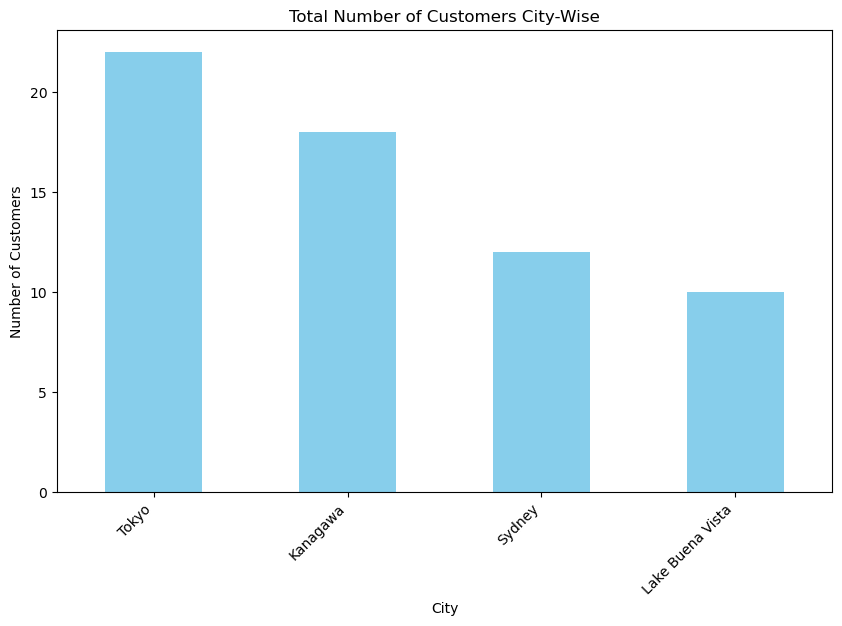

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
cst_df['city'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers City-Wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE

- It's a bar chart, where each bar represents a city, and the height of the bar indicates the number of customers in that city.
- By looking at the chart, you can quickly see which cities have more customers. The taller bars indicate more customers in those cities, while shorter bars represent fewer customers.

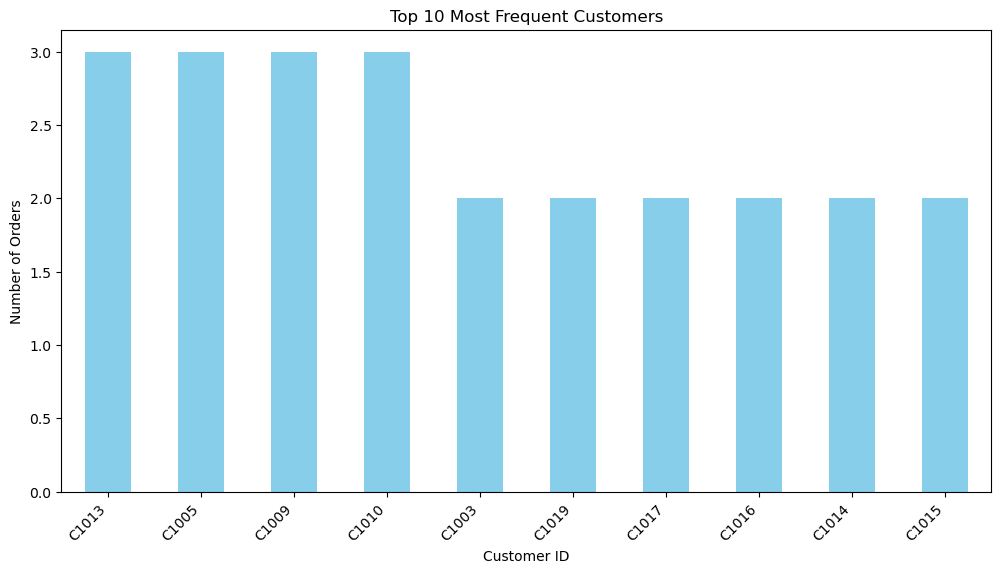

In [67]:
# Merge customer_data and orders on customer_id
df_combined = pd.merge(cst_df, od_df, on='customer_id')

# Count the number of orders for each customer
order_counts = df_combined['customer_id'].value_counts()

# Select the top 10 customers
top_10_customers = order_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE

- By looking at the chart, you can easily identify the top 10 customers who have placed the most orders.

- Taller bars represent customers with a higher number of orders, providing a quick overview of the most frequent customers.

- This kind of analysis is valuable for identifying and recognizing active customers.

## Product Analysis

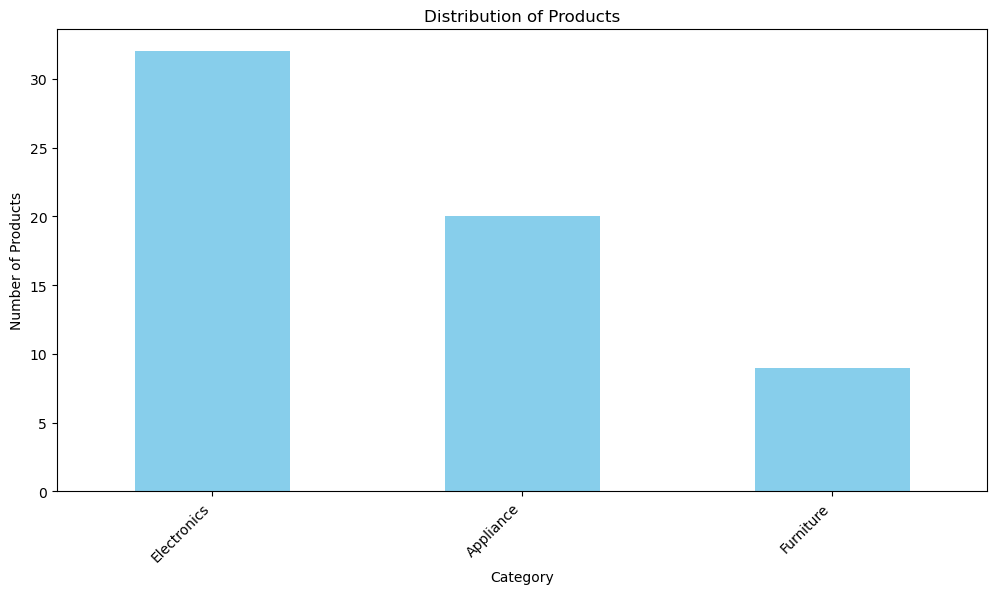

In [68]:
# Plotting
plt.figure(figsize=(12, 6))
pdt_df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Products')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE

- By looking at the chart, you can quickly see which product categories have more products. The taller bars indicate more products in those categories, while shorter bars represent fewer products.

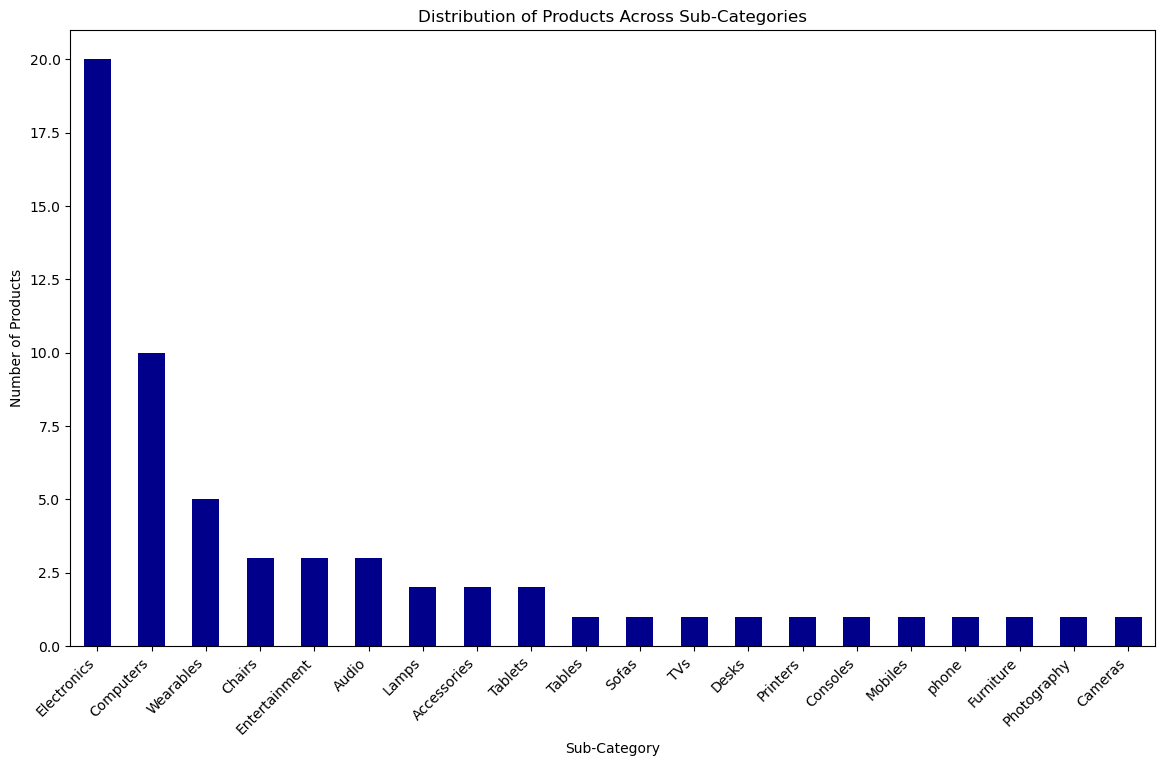

In [44]:
# Plotting
plt.figure(figsize=(14, 8))
pdt_df['sub_category'].value_counts().plot(kind='bar', color='darkblue')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE

-  By looking at the chart, you can quickly see which sub-categories have more products. The taller bars indicate more products in those sub-categories, while shorter bars represent fewer products.

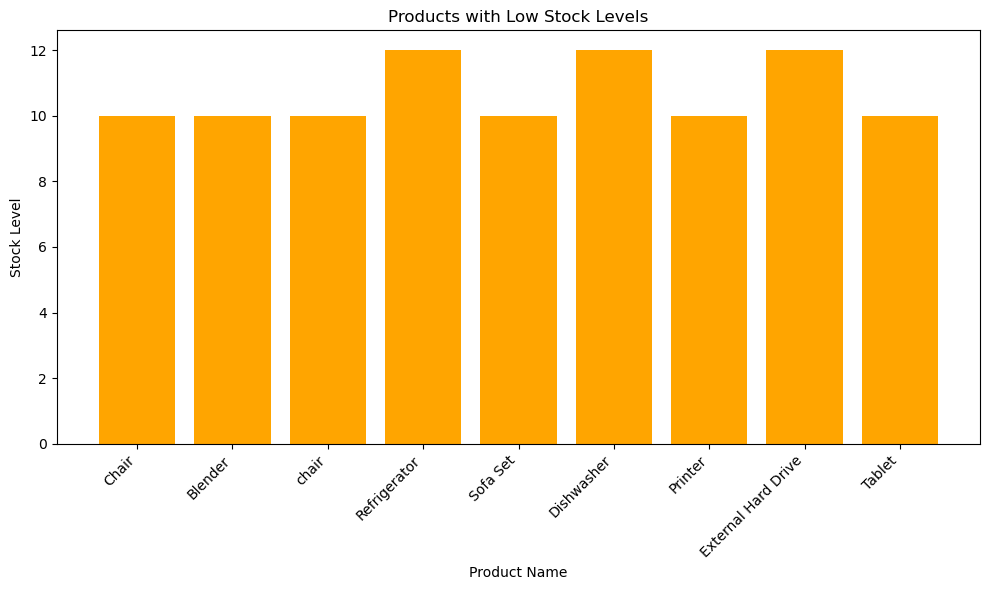

In [45]:
low_stock = 15
low_stock_prod = pdt_df[pdt_df['stock'] < low_stock]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(low_stock_prod['product_name'], low_stock_prod['stock'], color='orange')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()

# Show the bar chart
plt.show()

## INFERENCE

- By looking at the chart, you can quickly identify and visualize products that are running low in stock. The shorter bars indicate products with low stock levels, helping in inventory management decisions.

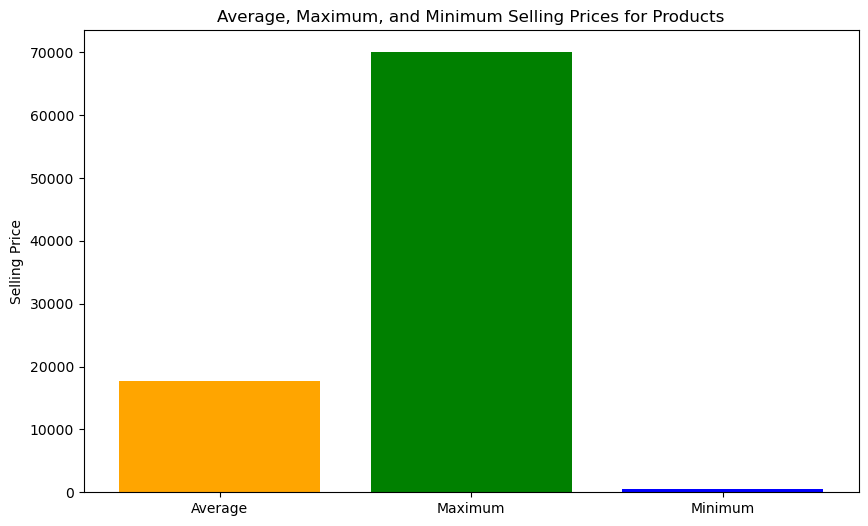

In [46]:
# Calculate average, maximum, and minimum selling prices
average_price = pdt_df['selling_price'].mean()
maximum_price = pdt_df['selling_price'].max()
minimum_price = pdt_df['selling_price'].min()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_price, maximum_price, minimum_price], color=['orange', 'green', 'blue'])
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.xlabel('')
plt.ylabel('Selling Price')
plt.show()

## INFERENCE
- By looking at the chart, you can easily compare the average, maximum, and minimum selling prices.
- The bar heights represent the respective values, providing a quick overview of the price distribution.

## Order Analysis

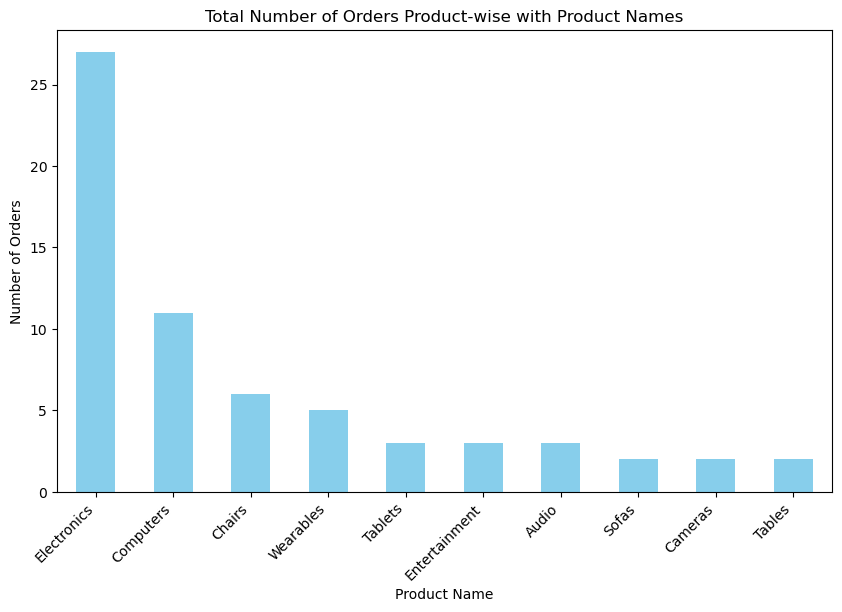

In [47]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Count the number of orders for each product
order_counts = df_combined['sub_category'].value_counts()

# Select the top 10 products
top_10_products = order_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE
- Merging Datasets: The pd.merge() function is used to combine the 'orders' (od_df) and 'products' (pdt_df) DataFrames based on the 'product_id'.
- Counting Orders: The number of orders for each product is calculated using value_counts() on the 'sub_category' column.
- The chart provides a quick overview of the most popular products based on the number of orders.
- Taller bars represent products with a higher number of orders, allowing for easy identification of popular items.

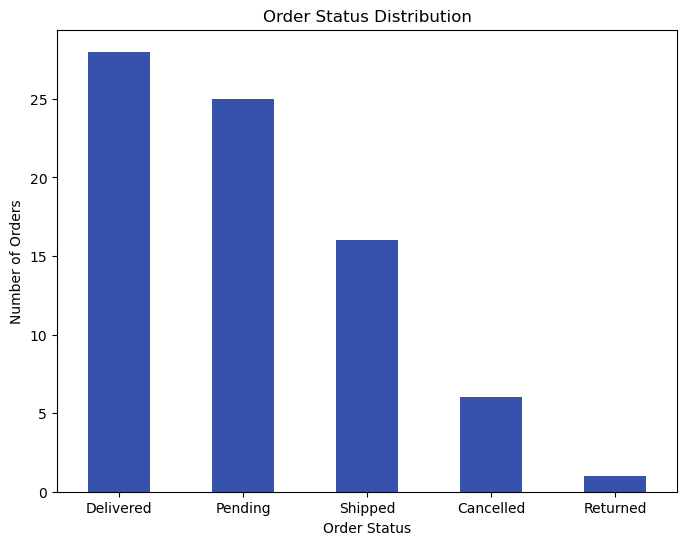

In [48]:
# Count the number of orders for each status
order_status_counts = od_df['order_status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='#3652AD')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Do not rotate x-axis labels for order status
plt.show()

## INFERENCE

- The value_counts() function is used on the 'order_status' column of the 'orders' DataFrame (od_df) to count the occurrences of each order status.
- The chart provides a visual breakdown of how many orders fall into each status category.
- It helps in understanding the distribution of orders across different states such as shipped, delivered, pending, etc.

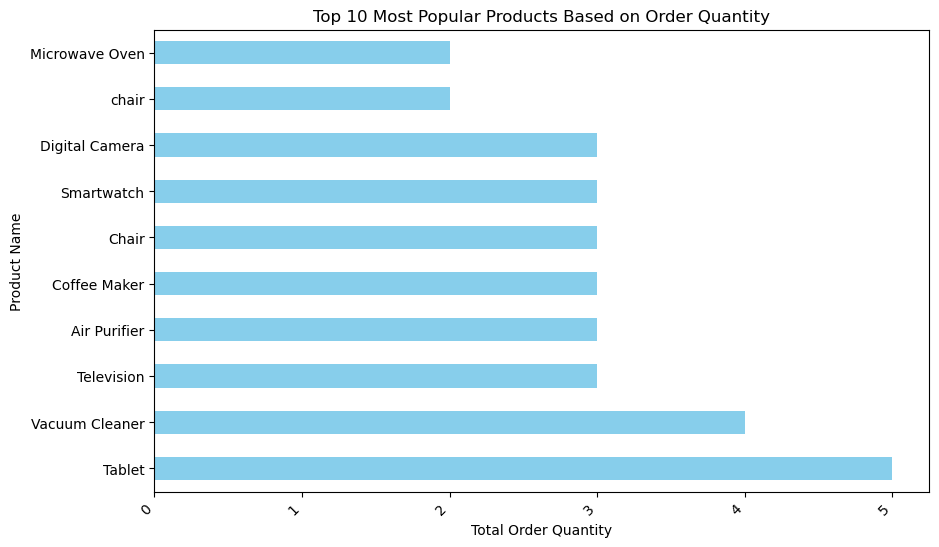

In [49]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Count the number of orders for each product
order_quantity = df_combined['product_name'].value_counts()

# Select the top 10 products
top_10_products = order_quantity.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE 
- Merging Datasets: The pd.merge() function is used to combine the 'orders' (od_df) and 'products' (pdt_df) DataFrames based on the 'product_id'.
- Counting Order Quantity: The number of orders for each product is calculated using value_counts() on the 'product_name' column.
- The chart provides a quick visual representation of the top 10 products that have the highest order quantities.
- Longer bars represent products with a higher number of orders, making it easy to identify popular items.

## Sales Analysis

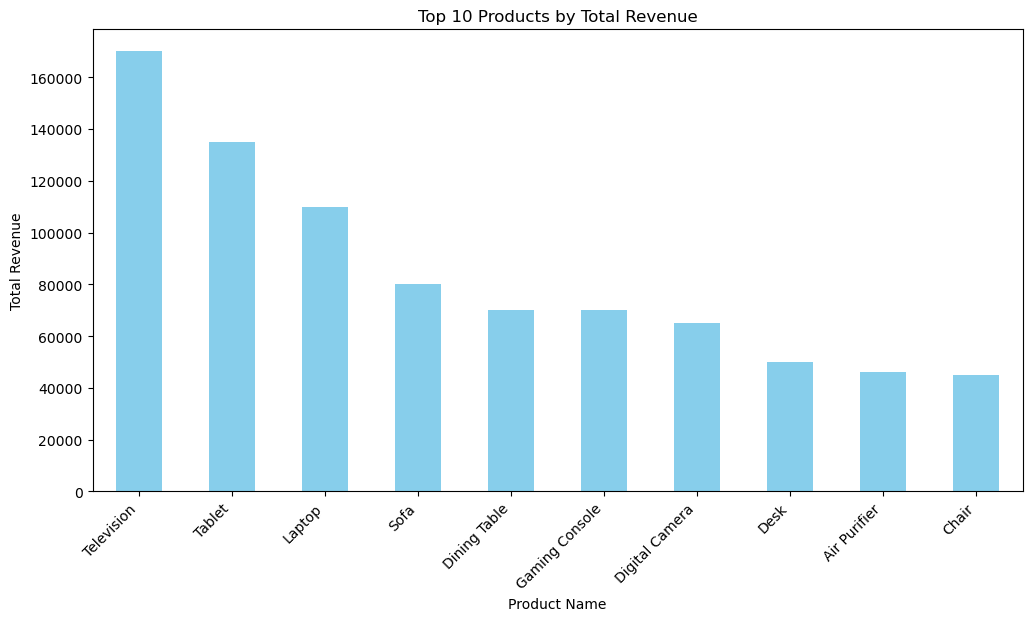

In [50]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total revenue for each product without adding an extra column
product_total_revenue = df_combined.groupby('product_name')['selling_price'].sum()

# Select the top 10 products based on total revenue
top_10_revenue_products = product_total_revenue.nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_revenue_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE
- **Merging Datasets:** The pd.merge() function is used to combine the 'orders' (od_df) and 'products' (pdt_df) DataFrames based on the 'product_id'.
- **Calculating Total Revenue:** The total revenue for each product is calculated using groupby('product_name')['selling_price'].sum().
- **Selecting Top 10 Revenue Products:** The top 10 products with the highest total revenue are selected using nlargest(10).
- The chart provides a visual representation of the top 10 products that have generated the highest total revenue.
- Longer bars represent products with higher total revenue, making it easy to identify the most profitable items.

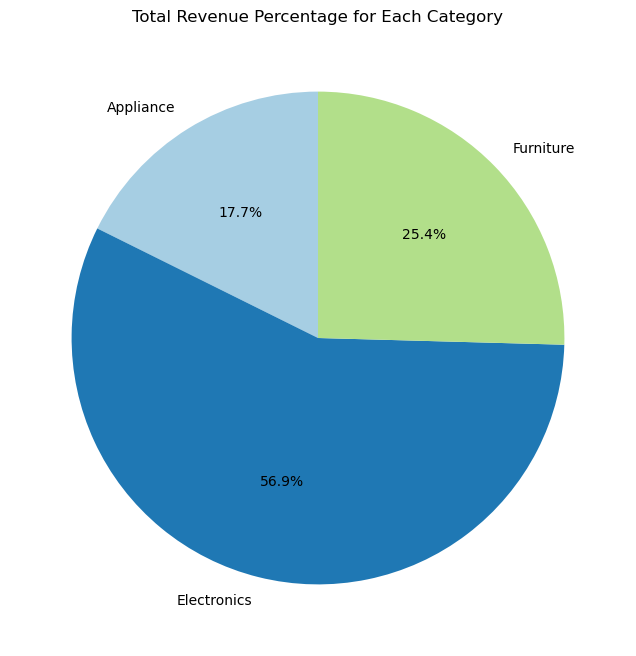

In [51]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total revenue for each category
category_total_revenue = df_combined.groupby('category')['selling_price'].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_total_revenue, labels=category_total_revenue.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Revenue Percentage for Each Category')
plt.show()

## INFERENCE
- Merging Datasets: The pd.merge() function is used to combine the 'orders' (od_df) and 'products' (pdt_df) DataFrames based on the 'product_id'.
- Calculating Total Revenue: The total revenue for each category is calculated using groupby('category')['selling_price'].sum().
- The pie chart visually represents the proportion of total revenue contributed by each category.
- Larger slices indicate categories with a higher share of the total revenue, providing an overview of revenue distribution among different product categories.

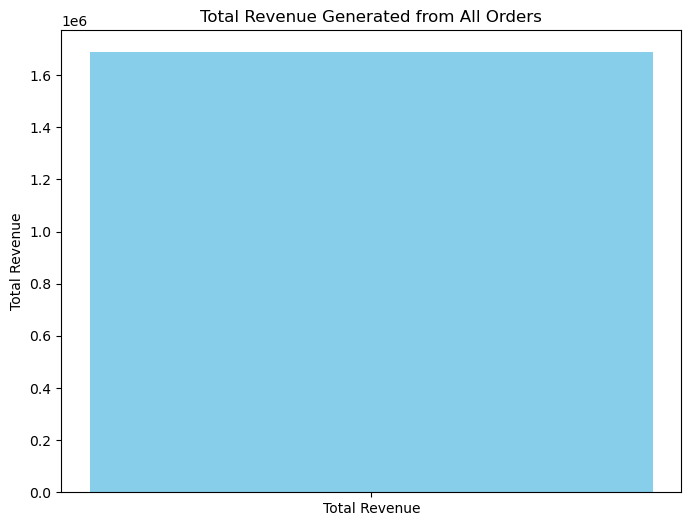

In [52]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total revenue for each product
df_combined['total_revenue'] = df_combined['quantity'] * df_combined['selling_price']

# Calculate overall total revenue
overall_total_revenue = df_combined['total_revenue'].sum()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [overall_total_revenue], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue')
plt.show()

## INFERENCE
- Merging Datasets: The pd.merge() function is used to combine the 'orders' (od_df) and 'products' (pdt_df) DataFrames based on the 'product_id'.
- Calculating Total Revenue: The total revenue for each product is calculated by multiplying the quantity sold (quantity) by the selling price (selling_price) and creating a new column named 'total_revenue'.
- The bar chart provides a quick overview of the overall total revenue generated from all orders.

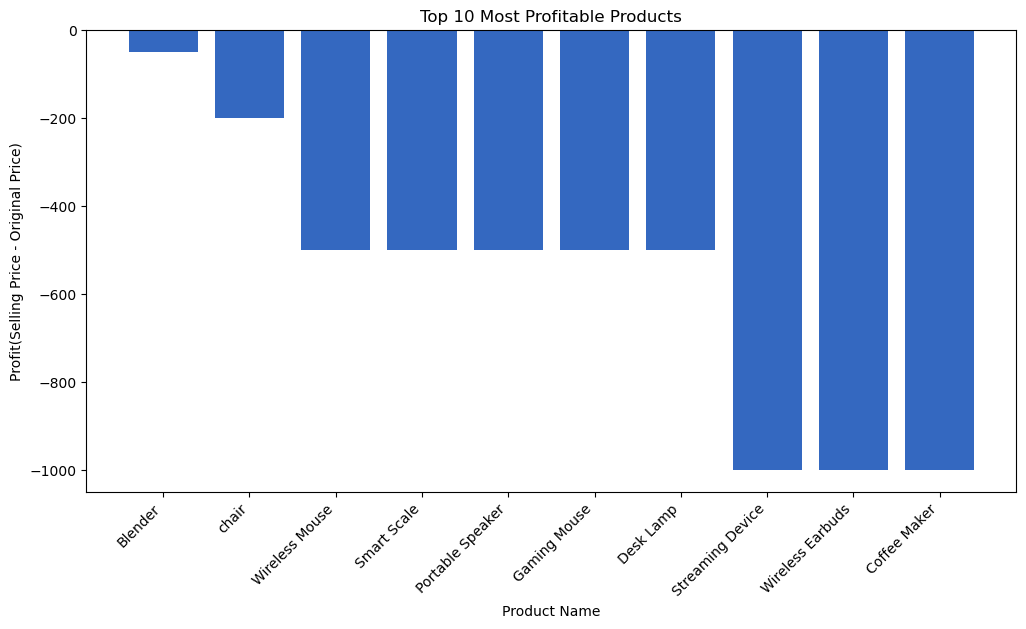

In [53]:
# Calculate profit for each product
pdt_df['profit'] = pdt_df['selling_price'] - pdt_df['original_price']

# Sort products based on profit in descending order
df_products_sorted = pdt_df.sort_values(by='profit', ascending=False)

# Select the top 10 most profitable products
top_10_profitable_products = df_products_sorted.head(10)

# Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_profitable_products['product_name'], top_10_profitable_products['profit'], color='#3468C0')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit(Selling Price - Original Price)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INFERENCE
- Calculating Profit: Profit for each product is computed by subtracting the original cost (original_price) from the selling price (selling_price), and a new column named 'profit' is added to the DataFrame.
- Sorting Products: The DataFrame (pdt_df) is sorted based on profit in descending order, meaning products with the highest profits will be at the top.
- The bar chart provides a clear view of the top 10 most profitable products, making it easy to identify which products contribute the most to the overall profit.

## Customer Order Patterns

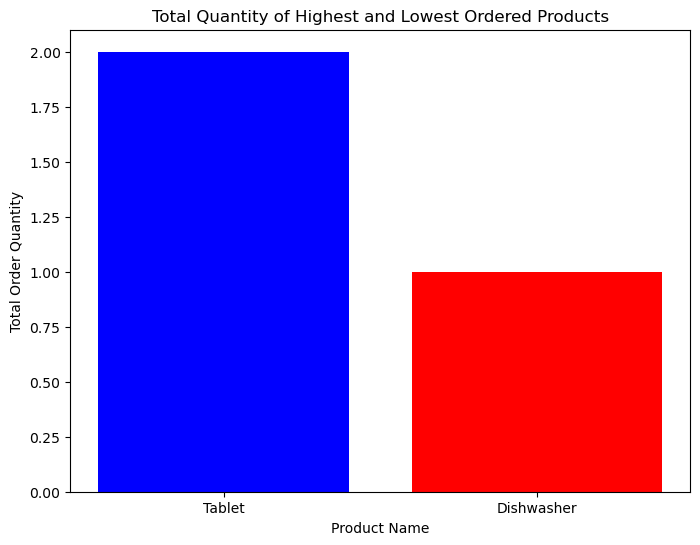

In [54]:
# Merge orders and products on product_id
merged_df = pd.merge(od_df, pdt_df, on='product_id')

# Group by product and sum the quantity
product_quantity = merged_df.groupby('product_name')['quantity'].sum()

# Identify the product with the highest quantity
highest_quantity_product = product_quantity.idxmax()

# Identify the product with the lowest quantity
lowest_quantity_product = product_quantity.idxmin()

# Filter data for the two products
highest_lowest_data = merged_df[merged_df['product_name'].isin([highest_quantity_product, lowest_quantity_product])]

# Create a bar chart
plt.figure(figsize=(8, 6))
colors = ['red' if product == lowest_quantity_product else 'blue' for product in highest_lowest_data['product_name']]
plt.bar(highest_lowest_data['product_name'], highest_lowest_data['quantity'], color=colors)
plt.title('Total Quantity of Highest and Lowest Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')

plt.show()

## INFERENCE
- Merging DataFrames: The 'orders' and 'products' DataFrames are merged based on the 'product_id' column.
- Grouping and Summing Quantity: The merged DataFrame is then grouped by 'product_name', and the quantity of each product is summed to get the total order quantity for each product.
- Identifying Highest and Lowest Quantity Products: The product with the highest order quantity and the one with the lowest order quantity are identified.
- Filtering Data: The data is filtered to include only the information for the identified highest and lowest quantity products.
- The bar chart allows for a quick comparison of order quantities between the product with the highest and lowest quantities.


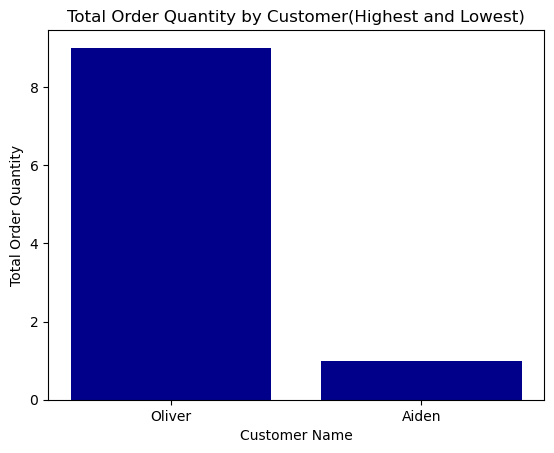

In [55]:
# Merge orders and customers on customer_id
df_combined = pd.merge(od_df, cst_df, on='customer_id')


#Calculate total order quantity for each customer
total_order_quantity = df_combined.groupby('name')['quantity'].sum()

# Identify the customer with the highest and lowest order quantities
highest_quantity_customer = total_order_quantity.idxmax()
lowest_quantity_customer = total_order_quantity.idxmin()

# Filter data for the two products
highest_lowest_data = df_combined[df_combined['name'].isin([highest_quantity_customer, lowest_quantity_customer])]

# Highlight the customers with the highest and lowest order quantities
plt.bar(highest_quantity_customer, total_order_quantity[highest_quantity_customer], color='darkblue')
plt.bar(lowest_quantity_customer, total_order_quantity[lowest_quantity_customer], color='darkblue')

plt.title('Total Order Quantity by Customer(Highest and Lowest)')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')

plt.show()

## INFERENCE
- Merging DataFrames: The 'orders' and 'customers' DataFrames are merged based on the 'customer_id' column.
- Calculating Total Order Quantity: The merged DataFrame is then grouped by 'name' (customer name), and the quantity of each customer's orders is summed to get the total order quantity for each customer.
- Identifying Highest and Lowest Quantity Customers:The customer with the highest total order quantity and the one with the lowest total order quantity are identified.
- Filtering Data: The data is filtered to include only the information for the identified highest and lowest quantity customers.
- The bar chart allows for a clear comparison of total order quantities between customers.
- It visually emphasizes the customers with the highest and lowest order quantities, helping to identify key customers in terms of order volume.

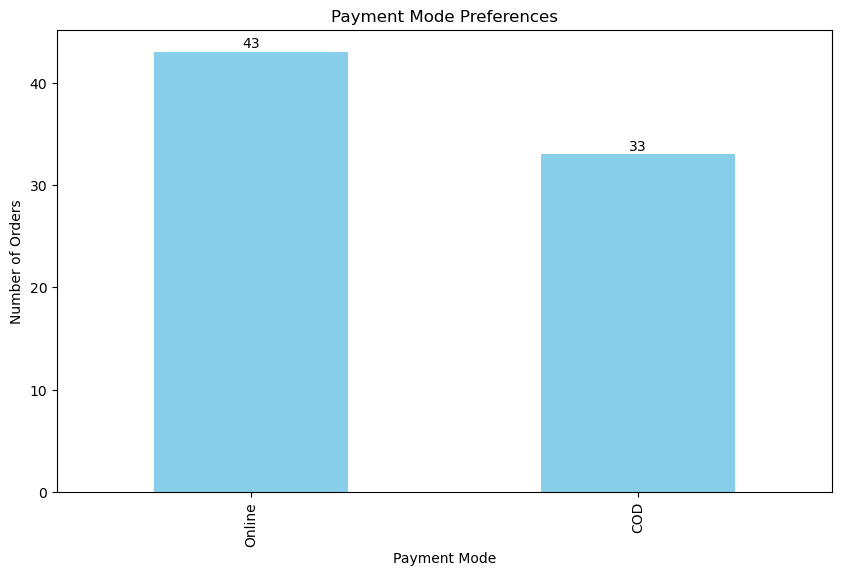

In [56]:
# Calculate the count of each payment mode
payment_mode_counts = od_df['payment_mode'].value_counts()

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')

# Label each bar with its count
for i, count in enumerate(payment_mode_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Payment Mode Preferences')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')

plt.show()

## INFERENCE
- Calculating Payment Mode Counts: The code counts the occurrences of each payment mode in the 'payment_mode' column of the 'orders' DataFrame.
- The bar chart visually communicates the most preferred payment modes based on order counts.
- It allows easy comparison between different payment modes, helping to identify which mode is most commonly used.

## Time-based Analysis

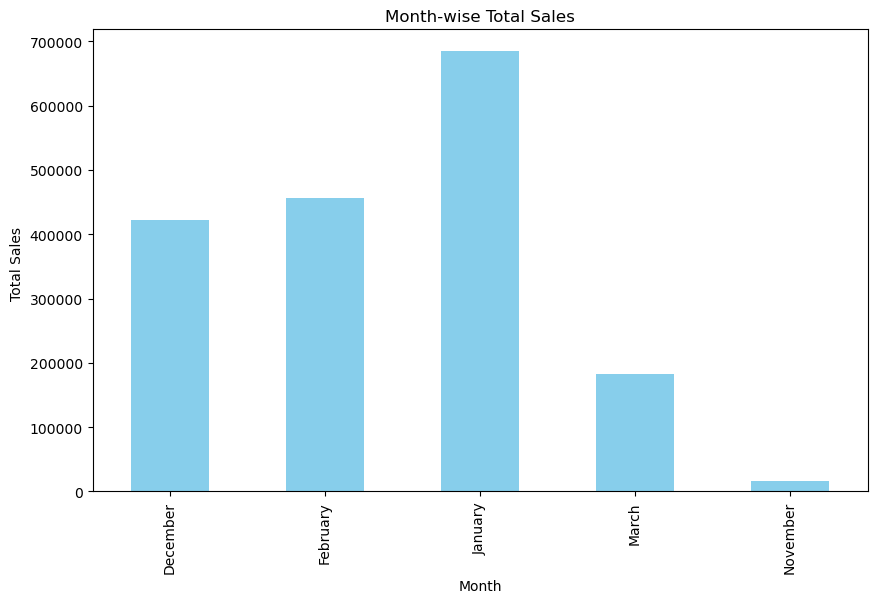

In [57]:
# Merge order and product tables
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate month-wise total product sales
monthwise_product_sales = df_combined.groupby('month')['quantity'].sum() * df_combined.groupby('month')['selling_price'].mean()

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
monthwise_product_sales.plot(kind='bar', color='skyblue')

# Label each bar with its total sales
for i, sales in enumerate(monthwise_product_sales):
    plt.text(i, sales + 10, '', ha='center', va='bottom')

plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ')

plt.show()

## INFERENCE
- Merging DataFrames: The 'orders' and 'products' DataFrames are merged on the 'product_id' column.
- Calculating Month-wise Sales: The code calculates the month-wise total product sales by grouping the combined DataFrame by the 'month' column. The total sales for each month are calculated as the sum of the product of 'quantity' and 'selling_price' for each order.
- The bar chart visually communicates the variation in total product sales across different months.

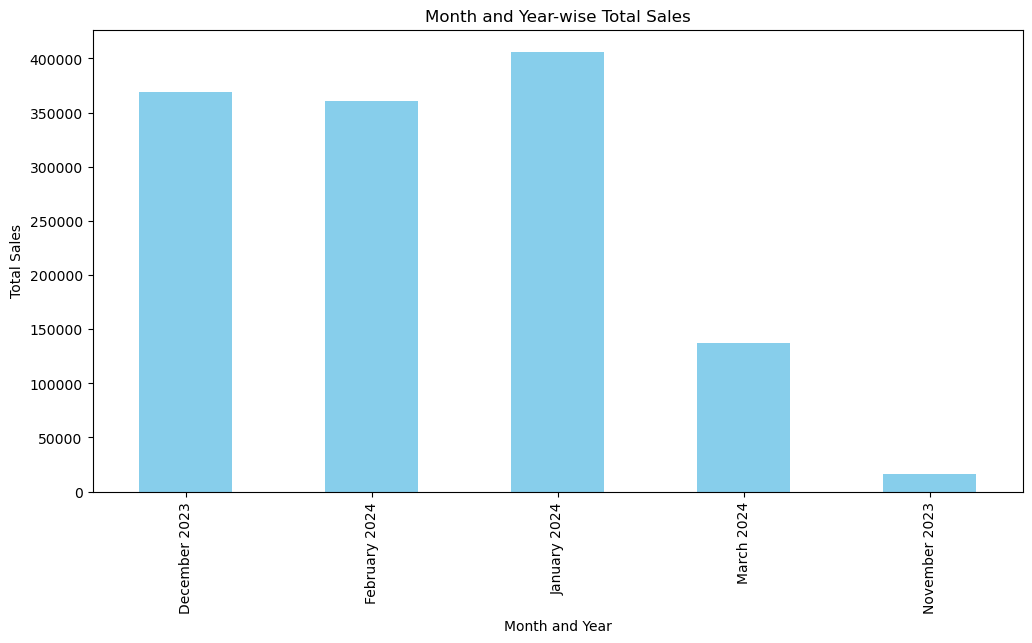

In [58]:
# Merge order and product tables
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Extract month and year from the 'order_date' column
df_combined['month_year'] = df_combined['order_date'].dt.strftime('%B %Y')

# Calculate month and year-wise total sales
month_yearwise_sales = df_combined.groupby('month_year')['selling_price'].sum()

# Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
month_yearwise_sales.plot(kind='bar', color='skyblue')

# Label each bar with its total sales
for i, sales in enumerate(month_yearwise_sales):
    plt.text(i, sales + 10, '', ha='center', va='bottom')

plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')

plt.show()

## INFERENCE
- Merging DataFrames: The 'orders' and 'products' DataFrames are merged on the 'product_id' column.
- Extracting Month and Year: The 'order_date' column is converted into a new 'month_year' column, representing the month and year of each order.
- Calculating Month and Year-wise Sales: The code calculates the month and year-wise total product sales by grouping the combined DataFrame based on the 'month_year' column. The total sales for each month and year are calculated as the sum of the 'selling_price' for each order.
- The bar chart provides a clear overview of how total product sales vary across different months and years.

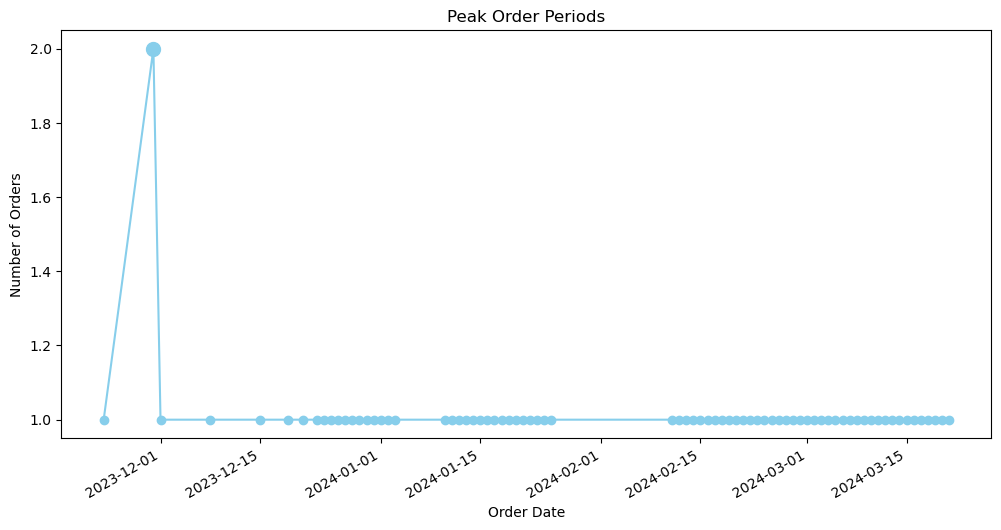

In [59]:
# Count the number of orders for each date
order_counts = od_df['order_date'].value_counts().sort_index()

# Visualize the results using a line chart
plt.figure(figsize=(12, 6))
order_counts.plot(kind='line', marker='o', color='skyblue')

# Identify the peak order date
peak_order_date = order_counts.idxmax()
peak_order_count = order_counts.max()

# Plot a red dot at the peak order date
plt.scatter(peak_order_date, peak_order_count, color='skyblue', s=100, zorder=5)

plt.title('Peak Order Periods')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')

plt.show()

## INFERENCE
- Counting Orders: The code counts the number of orders for each date using the 'order_date' column in the 'orders' DataFrame. The results are sorted by date.
- Identifying Peak Order Date:
     The code identifies the peak order date by finding the date with the maximum number of orders.
      The dot draws attention to the peak order date, allowing quick identification of the day with the highest number of orders.

## Geographical Analysis

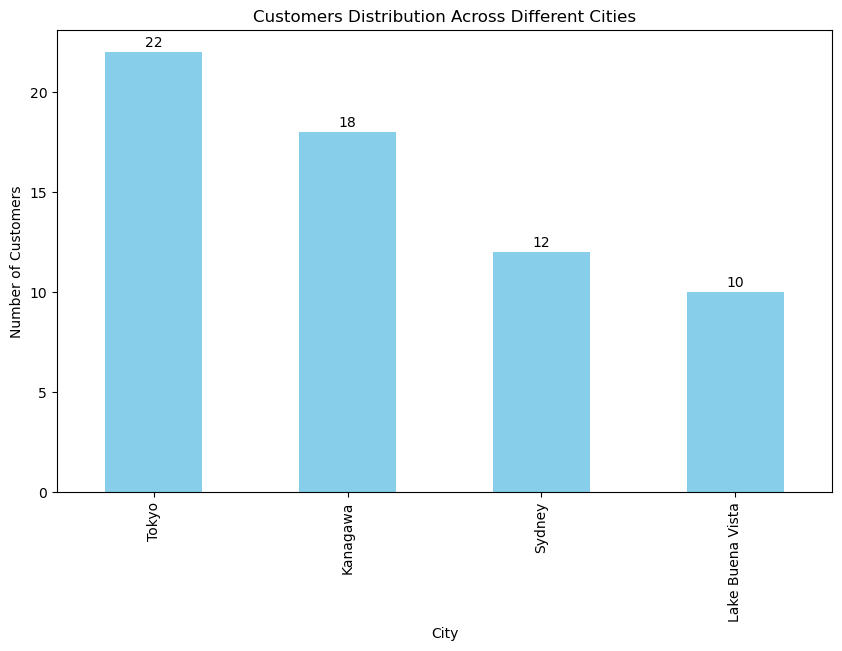

In [60]:
# Count the number of customers in each city
city_counts = cst_df['city'].value_counts()

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')

# Label each bar with the customer count
for i, count in enumerate(city_counts):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')

plt.title('Customers Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')

plt.show()

## INFERENCE
- Counting Customers in Each City: The code counts the number of customers in each city using the 'city' column in the 'customer_data' DataFrame.
- The bar chart provides a visual overview of how customers are distributed among different cities.
- The height of each bar reflects the number of customers in a specific city, making it easy to compare customer counts across different locations.

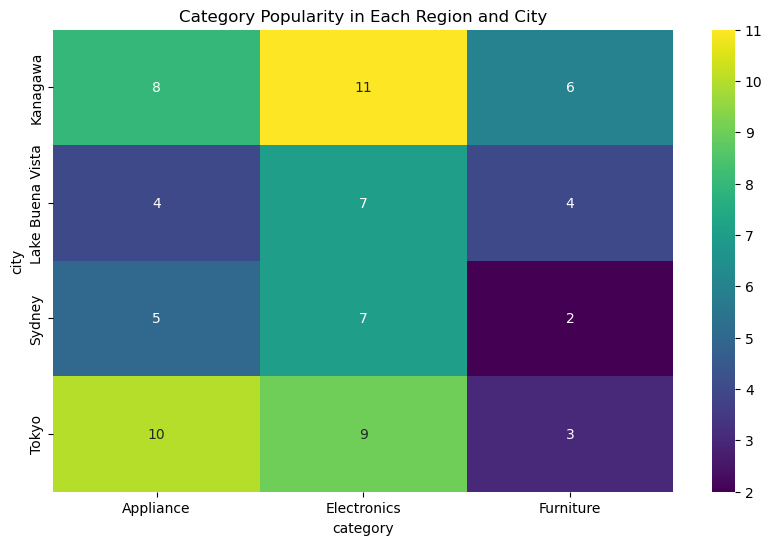

In [61]:
# Merge orders and products on 'product_id'
df_combined = pd.merge(od_df, pdt_df[['product_id','category']], on='product_id', how='left')
final_data = pd.merge(df_combined, cst_df[['customer_id','city']], on='customer_id', how='left')

corelation_coefficient=final_data.groupby(['city','category']).size().unstack().fillna(0)

plt.figure(figsize=(10,6 ))

sns.heatmap(corelation_coefficient, cmap='viridis', annot=True)
plt.title('Category Popularity in Each Region and City')

plt.show()

## INFERENCE
- Merging Data: The code merges the 'orders' DataFrame with a subset of the 'products' DataFrame containing only 'product_id' and 'category'. Then, it merges the resulting DataFrame with the 'customer_data' DataFrame, including only 'customer_id' and 'city'.
- Correlation Coefficient Calculation: The data is grouped by 'city' and 'category,' and the size of each group is calculated. The resulting data is reshaped into a matrix where rows represent cities, columns represent product categories, and the values represent the count of orders for each city and category combination.
- Each cell in the heatmap represents the correlation (popularity) between a specific city and product category. The color intensity indicates the strength of correlation.

## Product Performance

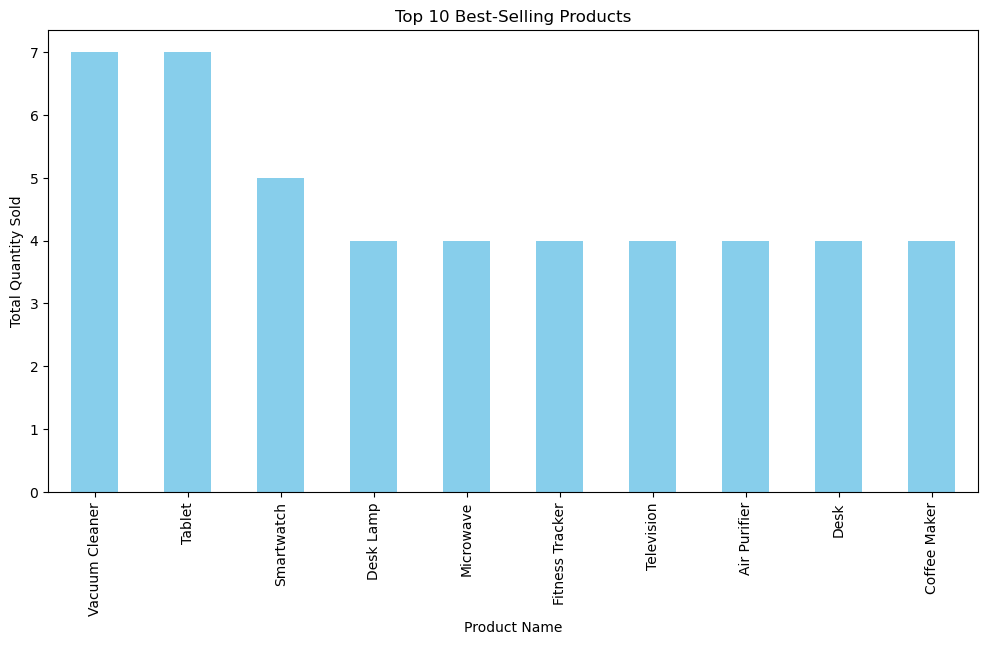

In [62]:
# Merge orders and products on 'product_id'
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total quantity sold for each product sub-category
total_quantity_sold = df_combined.groupby('product_name')['quantity'].sum()

# Sort the products based on total quantity sold and get the top 10
top_10_products = total_quantity_sold.sort_values(ascending=False).head(10)

# Visualize the top 10 best-selling products on a bar chart
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')

plt.show()

## INFERENCE
- Merging DataFrames: The code merges the 'orders' and 'products' DataFrames on the 'product_id' column to create a combined DataFrame ('df_combined').
- Calculating Total Quantity Sold: The code then groups the combined DataFrame by 'product_name' and calculates the total quantity sold for each product.
- Selecting Top 10 Products: It sorts the products based on the total quantity sold in descending order and selects the top 10 products.
- The bar chart helps identify the most popular products in terms of quantity sold.
- It provides a quick overview of the top-performing products, allowing businesses to focus on these items for potential marketing strategies or inventory management.

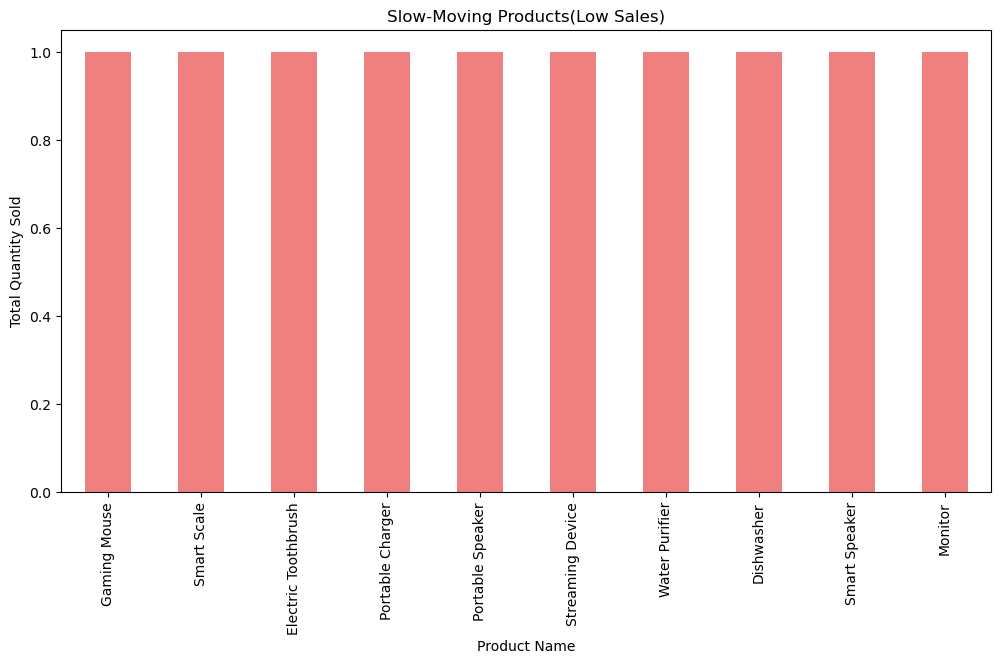

In [63]:
# Merge product and order on 'product_id'
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total quantity sold for each product
total_quantity_sold = df_combined.groupby('product_name')['quantity'].sum()

# Calculate average selling price for each product
average_selling_price = df_combined.groupby('product_name')['selling_price'].mean()

# Combine total quantity sold and average selling price into a single DataFrame
slow_moving_df = pd.DataFrame({'Total Quantity Sold': total_quantity_sold, 'Average Selling Price': average_selling_price})

# Sort products based on total quantity sold and average selling price, then get the bottom 10
top_10_slow_moving_products = slow_moving_df.sort_values(by=['Total Quantity Sold', 'Average Selling Price']).head(10)

# Visualize the top 10 slow-moving products on a bar chart
plt.figure(figsize=(12, 6))
top_10_slow_moving_products['Total Quantity Sold'].plot(kind='bar', color='lightcoral')
plt.title('Slow-Moving Products(Low Sales)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')

plt.show()


## INFERENCE
- Merging DataFrames: The code merges the 'orders' and 'products' DataFrames on the 'product_id' column to create a combined DataFrame ('df_combined').
- Calculating Total Quantity Sold and Average Selling Price: It then calculates the total quantity sold and the average selling price for each product.
- Combining Data: The code combines these calculated values into a new DataFrame ('slow_moving_df').
- Sorting and Selecting Bottom 10 Slow-Moving Products: It sorts the products based on both the total quantity sold and average selling price in ascending order. It selects the bottom 10 products, representing slow-moving products.
- The bar chart helps identify products with low sales volume and may indicate items that require attention.

## Payment Analysis

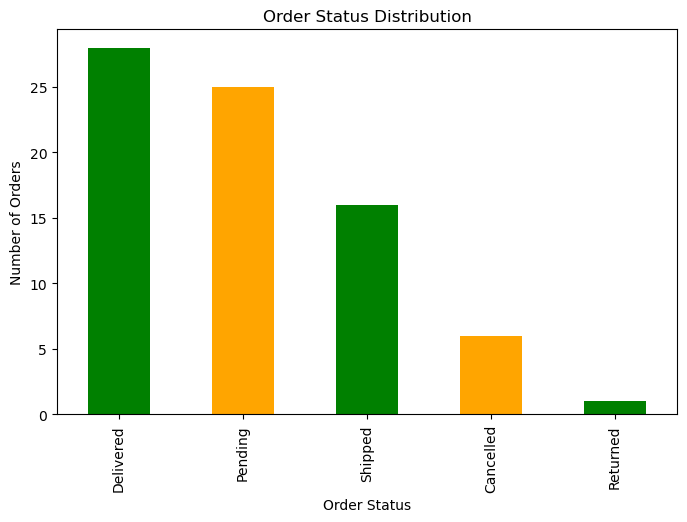

In [64]:
# Count the number of successful and pending payments
payment_counts = od_df['order_status'].value_counts()

# Visualize the counts on a bar chart
plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color=['green', 'orange'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')

plt.show()

## INFERENCE
- Counting Order Status: The code uses the 'value_counts()' function on the 'order_status' column of the 'orders' DataFrame ('od_df') to count the occurrences of each order status.
- The bar chart provides a clear comparison between successful and pending payments.

## Customer Retention

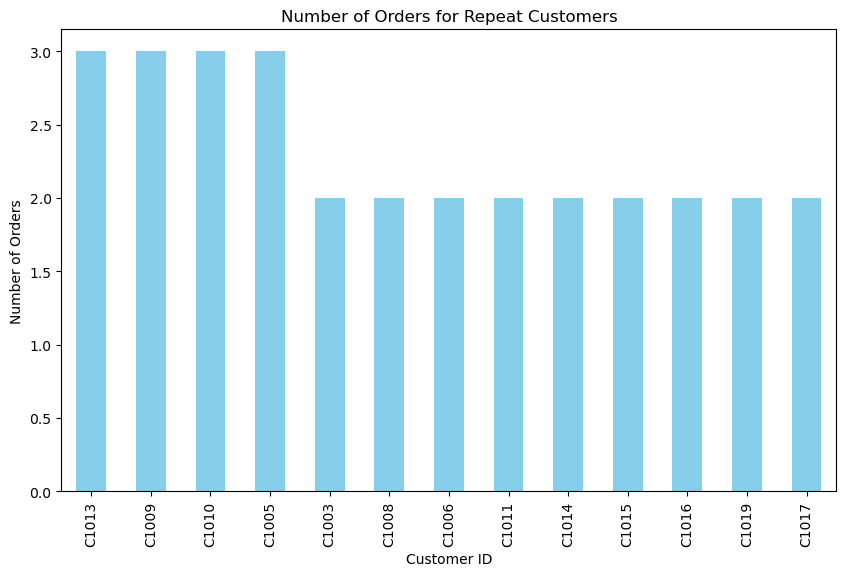

In [65]:
# Count the number of orders per customer
customer_order_counts = od_df['customer_id'].value_counts()

# Filter repeat customers (customers with more than one order)
repeat_customers = customer_order_counts[customer_order_counts > 1]

# Plot the bar chart for repeat customers and their order counts
plt.figure(figsize=(10, 6))
repeat_customers.plot(kind='bar', color='skyblue')
plt.title('Number of Orders for Repeat Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

## INFERENCE
- Counting Orders per Customer: The code uses the 'value_counts()' function on the 'customer_id' column of the 'orders' DataFrame ('od_df') to count the number of orders for each customer.
- Identifying Repeat Customers: It filters the customers who have placed more than one order, creating a subset of repeat customers.

# INSIGHTS

### Data Import and Connectivity:
**Libraries: The necessary libraries, including pandas, numpy, matplotlib, seaborn, and mysql.connector, are imported for data manipulation and visualization.**

**Database Connectivity: A connection is established to the MySQL database, and data is queried from three tables: product, customer, and order_details.**
### Data Preview:
**Head and Tail: The first and last 5 rows of each dataset (product, customer, and order_details) are displayed using the head() and tail() functions, providing an initial overview of the data.**
### Data Summary:
**Shape of Datasets:
Product dataset: 61 rows, 7 columns
Customer dataset: 62 rows, 7 columns
Order_details dataset: 76 rows, 11 columns**
### Info Function:
**No missing values are observed in any variable column for all datasets.**
### Describe Function:
**Descriptive statistics are presented, including count, mean, std, min, max, and quartiles.**
## Product Dataset:
### Unique Values:
**product_id: 61 unique IDs with no duplicates.
product_name, category, sub_category, original_price, selling_price, stock: Variable counts indicate repeated values.**
### Null Values:
**No missing values observed in any column.**
### Data Cleaning Actions:
**Replaced 'chairs' with 'Chairs' in the 'sub_category' column.
Replaced 'computer' with 'Computers' in the 'sub_category' column.
Replaced 'furniture' with 'Furniture' in the 'category' column.**
## Customer Dataset:
### Unique Values:
**customer_id: 62 unique IDs with no duplicates.
name, city, email, phone_no, address, pin_code: Variable counts indicate repeated values.**
### Null Values:
**No missing values observed in any column.**
### Order_Details Dataset:
**Unique Values:
order_id: Variable counts indicate repeated values.
product_id: 76 unique IDs with no duplicates.**
### Null Values:
**No missing values observed in any column.**
### Data Cleaning Actions:
**Changed 'delivered' to 'Delivered' in the 'order_status' column.
Checked and removed duplicate rows based on all columns.**
### Data Type and Date Conversion:
**Order_Details:
Converted the 'quantity' column to integer data type.
Converted the 'order_date' column to datetime object.
Extracted day, month, and year into separate columns.**
### Additional Observations:
**Duplicates:
Checked and removed duplicate rows in all datasets based on all columns.**
### Overall Cleanliness:
**No missing values or anomalies were found after data cleaning.
Data types and formats have been appropriately adjusted.**

## Customer Analysis:
### City-wise Customer Distribution:

**The bar chart illustrates the total number of customers in each city.**
### Top 10 Most Frequent Customers:

**By merging customer and order data, the analysis identifies the top 10 customers with the most orders.**
## Product Analysis:
### Product Category Distribution:

**Bar chart showcasing the total number of products in each category.**
### Sub-Category Product Distribution:

**Another bar chart displaying the distribution of products across sub-categories.**
### Low Stock Products:

**Identification and visualization of products with low stock levels using an orange-colored bar chart.
Helps in inventory management by highlighting products that may require restocking.**
### Selling Price Analysis:

**Bar chart comparing average, maximum, and minimum selling prices.
Offers a visual overview of the price distribution, enabling insights into pricing strategies.**
## Order Analysis:
### Top 10 Products Based on Orders:

**Merging order and product data to count the number of orders for each product sub-category.
Visual representation of the top 10 products with the highest order counts.
Aids in identifying popular products based on order frequency.**
### Order Status Distribution:

**Bar chart showcasing the distribution of order statuses.
Helps in understanding the current status of orders, including shipped, delivered, pending, etc.**
### Top 10 Most Popular Products Based on Order Quantity:

**Merging order and product data to count the number of orders for each product.
Horizontal bar chart displaying the top 10 products with the highest order quantities.
Enables quick identification of products with high demand.**

## Sales Analysis:
### Top Revenue Products:

**Identified top revenue-generating products.**
### Revenue by Category:

**Explored revenue distribution across product categories.**
### Overall Total Revenue:

**Calculated overall total revenue from all orders.**
### Most Profitable Products:

**Identified and visualized top 10 most profitable products.**
## Customer Order Patterns:
### Product Order Quantities:

**Compared order quantities for specific products.**
### Total Order Quantity by Customer:

**Explored total order quantities for customers.**
### Preferred Payment Modes:

**Identified popular payment modes.**
## Time-based Analysis:
### Month-wise Total Product Sales:

**Explored variations in product sales across months.**
### Month and Year-wise Sales:

**Analyzed sales trends over months and years.**
### Daily Order Counts:

**Identified peak order date.**
## Geographical Analysis:
### Customer Distribution:

**Explored customer distribution across cities.**
### Category Popularity by City:

**Visualized category popularity in different cities.**
## Customer Retention:
### Repeat Customer Orders:
**Explored the significance of repeat customers.**



### The E-commerce data analysis provides comprehensive insights, including product performance, customer behavior, payment preferences, and temporal trends. Key highlights include identifying top revenue-generating products, understanding customer order patterns, and recognizing popular payment modes. This analysis equips businesses to make data-driven decisions for strategic growth and customer engagement.